## Vamos a calcular las curvas de veloc circular para las galaxias en el tiempo de formación de la barra

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## MW gagdet

In [30]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np
import time_conversion as tiempo

vector = ('00','01','03')
vector2 = ('M31', 'MW', 'M33')
h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

# path = '/home/ornela/SimCLUES/'
path = '/home/omarioni/'
atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]

path = '/mnt/is2/alejandro/ornella/'
#snapshot=range(381,380,-1)
snapshot=range(430,429,-1)

for isnap in snapshot:
    snap = h5py.File(path + 'outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    for i in range(1,2):
        cm   = snap['subhalo_0'+ str('%s'%vector[i])+ '/Center'].value
        r200 = snap['subhalo_0'+ str('%s'%vector[i])+ '/R200'].value
        
        pstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
        mstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Masses'].value
        vel  = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Velocities'].value
        
        pgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Coordinates'].value
        mgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Masses'].value
        
        pdrk = snap['subhalo_0'+ str('%s'%vector[i]) + '/Drk/Coordinates'].value
        mdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Masses'].value
        
        z = a0/aexp[isnap] - 1.
        Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
        time = tiempo.conv(z, h, omega_lambda, omega_matter)
        
        print time, aexp[isnap]
        
#---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
        ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
        zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
        
        xgas = (pgas[:,0]-cm[0])*aexp[isnap]/h
        ygas = (pgas[:,1]-cm[1])*aexp[isnap]/h
        zgas = (pgas[:,2]-cm[2])*aexp[isnap]/h
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)
        
        xdrk = (pdrk[:,0]-cm[0])*aexp[isnap]/h
        ydrk = (pdrk[:,1]-cm[1])*aexp[isnap]/h
        zdrk = (pdrk[:,2]-cm[2])*aexp[isnap]/h
        rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
         
        v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
        v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
        v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.
#----------------------masas----------------------------
        mstr = mstr/h
        mgas = mgas/h
        mdrk = mdrk/h
        
        r200 = r200*aexp[isnap]/h
        
        print 'r200 =', r200
        rgal=0.15*r200
        
        limit    = np.where(rstr<rgal)
        r_sort   = np.sort(rstr[limit])
        r_indice = np.argsort(rstr[limit])
        
        limit_str   = np.where(rstr<r200)
        rstr_sort   = np.sort(rstr[limit_str])
        rstr_indice = np.argsort(rstr[limit_str])
        
        limit_gas   = np.where(rgas<r200)
        rgas_sort   = np.sort(rgas[limit_gas])
        rgas_indice = np.argsort(rgas[limit_gas])
        
        limit_drk   = np.where(rdrk<r200)
        rdrk_sort   = np.sort(rdrk[limit_drk])
        rdrk_indice = np.argsort(rdrk[limit_drk])
        
        
        Mgal_str = cumsum((mstr[limit])[r_indice])
        
        Mc_str = cumsum((mstr[limit_str])[rstr_indice])
        
        Mc_gas = cumsum((mgas[limit_gas])[rgas_indice])
        
        Mc_drk = cumsum((mdrk[limit_drk])[rdrk_indice])
        
#------------------ calculamos r90, r50------------------------------------------
        M_gal = Mgal_str[-1]
    
        razon       = Mgal_str/M_gal
        setentaycinco,= np.where(razon < 0.75)
        cincuenta,    = np.where(razon < 0.50)
        veinticinco,  = np.where(razon < 0.25)
        
        r75 = r_sort[setentaycinco][-1]
        r50 = r_sort[cincuenta][-1]
        r25 = r_sort[veinticinco][-1]
#--------------------------------------------------------------       
        rtot = concatenate([rstr, rgas, rdrk])
        mtot = concatenate([mstr, mgas, mdrk])
        
        limit_tot   = np.where(rtot<r200)
        rtot_sort   = np.sort(rtot[limit_tot])
        rtot_indice = np.argsort(rtot[limit_tot])
        
        Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])
        
        #print 'Mvir=', Mc_tot[-1], 'r50=', r50[-1]
#--------------------------------------------------------------
        
        Vtot = np.sqrt((G*Mc_tot*1e10)/rtot_sort)
        Vstr = np.sqrt((G*Mc_str*1e10)/rstr_sort)
        Vgas = np.sqrt((G*Mc_gas*1e10)/rgas_sort)
        Vdrk = np.sqrt((G*Mc_drk*1e10)/rdrk_sort)
        
#----------------------------------------------------------------------------------

        data_tot = np.zeros([np.size(rtot_sort),3])
        data_tot[:,0]= rtot_sort
        data_tot[:,1]= Vtot
        data_tot[:,2]= Mc_tot*1e10
        
        data_str = np.zeros([np.size(rstr_sort),3])
        data_str[:,0]= rstr_sort
        data_str[:,1]= Vstr
        data_str[:,2]= Mc_str*1e10
        
        data_gas = np.zeros([np.size(rgas_sort),3])
        data_gas[:,0]= rgas_sort
        data_gas[:,1]= Vgas
        data_gas[:,2]= Mc_gas*1e10
        
        data_drk = np.zeros([np.size(rdrk_sort),3])
        data_drk[:,0]= rdrk_sort
        data_drk[:,1]= Vdrk
        data_drk[:,2]= Mc_drk*1e10
        
        data = np.ndarray([5,1])
        data[0] = r200
        data[1] = r50
        data[2] = r25
        data[3] = r75
        data[4] = M_gal*1e10

        np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_Vtot_tbar2.dat', data_tot)
        np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_Vstr_tbar2.dat', data_str)
        np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_Vgas_tbar2.dat', data_gas)
        np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_Vdrk_tbar2.dat', data_drk)
        np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_radios_tbar2.dat', data)

12.113839366769913 0.8766
r200 = 145.53356311475412


## MW gasoline

In [29]:
#Graficamos la veloc circular pero con la flecha de V200 y solo para los 3 halos mas grandes
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

vector = (1,2,4)
vector2 = ('M31', 'MW', 'M33')
G = 4.299e-6
a0 =1.

path = '/mnt/sersic2/omarioni/'

snapshot = np.loadtxt(path+'Gasoline/snapshots.txt', dtype='string')

#800 --- tiempo tbar
snap = h5py.File(path+'Gasoline/outputs2/snap_0896.h5py', 'r')

for i in range(1,2):
    cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'].value
    r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'].value
    aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'].value
    h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'].value
    time = snap['subhalo_00'+ str('%s' %vector[i])+ '/Time'].value
    
    print time, aexp
    
    omega_lambda = snap['subhalo_00'+ str('%s' %vector[i])+ '/OmegaL0'].value
    omega_matter = snap['subhalo_00'+ str('%s' %vector[i])+ '/OmegaM0'].value

    pstr = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
    mstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Masses'].value
    vel  = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Velocities'].value

    pgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Coordinates'].value
    mgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Masses'].value

    pdrk = snap['subhalo_00'+ str('%s' %vector[i]) + '/Drk/Coordinates'].value
    mdrk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Masses'].value

    H0 = h*100
    z = a0/aexp - 1.
    omega0 = omega_lambda + omega_matter
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0]) #*aexp
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = (pgas[:,0]-cm[0])
    ygas = (pgas[:,1]-cm[1])
    zgas = (pgas[:,2]-cm[2])
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = (pdrk[:,0]-cm[0])
    ydrk = (pdrk[:,1]-cm[1])
    zdrk = (pdrk[:,2]-cm[2])
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    #v_x = vel[:,0] *np.sqrt(aexp) + Ht *xstr/1000.
    #v_y = vel[:,1] *np.sqrt(aexp) + Ht *ystr/1000.
    #v_z = vel[:,2] *np.sqrt(aexp) + Ht *zstr/1000.
    
    v_x = vel[:,0] 
    v_y = vel[:,1] 
    v_z = vel[:,2]

#------------------------------------------------
    r200 = r200*aexp
    
    print 'r200=', r200
    rgal=0.15*r200

    limit    = np.where(rstr<rgal)
    r_sort   = np.sort(rstr[limit])
    r_indice = np.argsort(rstr[limit])

    limit_str   = np.where(rstr<r200)
    rstr_sort   = np.sort(rstr[limit_str])
    rstr_indice = np.argsort(rstr[limit_str])

    limit_gas   = np.where(rgas<r200)
    rgas_sort   = np.sort(rgas[limit_gas])
    rgas_indice = np.argsort(rgas[limit_gas])

    limit_drk   = np.where(rdrk<r200)
    rdrk_sort   = np.sort(rdrk[limit_drk])
    rdrk_indice = np.argsort(rdrk[limit_drk])


    Mgal_str = cumsum((mstr[limit])[r_indice])

    Mc_str = cumsum((mstr[limit_str])[rstr_indice])

    Mc_gas = cumsum((mgas[limit_gas])[rgas_indice])

    Mc_drk = cumsum((mdrk[limit_drk])[rdrk_indice])

#------------------ calculamos r90, r50------------------------------------------
    M_gal = Mgal_str[-1]

    razon       = Mgal_str/M_gal
    setentaycinco,= np.where(razon < 0.75)
    cincuenta,    = np.where(razon < 0.50)
    veinticinco,  = np.where(razon < 0.25)

    r75 = r_sort[setentaycinco][-1]
    r50 = r_sort[cincuenta][-1]
    r25 = r_sort[veinticinco][-1]
#--------------------------------------------------------------       
    rtot= concatenate([rstr, rgas, rdrk])
    mtot= concatenate([mstr, mgas, mdrk])

    limit_tot = np.where(rtot<r200)
    rtot_sort = np.sort(rtot[limit_tot])
    rtot_indice = np.argsort(rtot[limit_tot])
    
    Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])


#calculo rvir------------------------------------------
    '''rho_crit=3*(H0/1000)**2/(8*pi*G)
    rho=Mc_tot1*3/(4*pi*rtot_sort1**3)
    delta=rho/rho_crit
    kk=np.where(delta<200)
    rvir=rtot_sort1[kk]
    print rvir[0],(delta[kk])[0]'''
#--------------------------------------------------------------
    Mc_tot = Mc_tot[1:]
    Mc_str = Mc_str[1:]
    Mc_gas = Mc_gas[1:]
    Mc_drk = Mc_drk[1:]

    rtot_sort = rtot_sort[1:]
    rstr_sort = rstr_sort[1:]
    rgas_sort = rgas_sort[1:]
    rdrk_sort = rdrk_sort[1:]

    Vtot = np.sqrt((G*Mc_tot)/rtot_sort)
    Vstr = np.sqrt((G*Mc_str)/rstr_sort)
    Vgas = np.sqrt((G*Mc_gas)/rgas_sort)
    Vdrk = np.sqrt((G*Mc_drk)/rdrk_sort)

#----------------------------------------------------------------------------------

    data_tot = np.zeros([np.size(rtot_sort),3])
    data_tot[:,0]= rtot_sort
    data_tot[:,1]= Vtot
    data_tot[:,2]= Mc_tot

    data_str = np.zeros([np.size(rstr_sort),3])
    data_str[:,0]= rstr_sort
    data_str[:,1]= Vstr
    data_str[:,2]= Mc_str

    data_gas = np.zeros([np.size(rgas_sort),3])
    data_gas[:,0]= rgas_sort
    data_gas[:,1]= Vgas
    data_gas[:,2]= Mc_gas

    data_drk = np.zeros([np.size(rdrk_sort),3])
    data_drk[:,0]= rdrk_sort
    data_drk[:,1]= Vdrk
    data_drk[:,2]= Mc_drk

    data = np.ndarray([5,1])
    data[0] = r200
    data[1] = r50
    data[2] = r25
    data[3] = r75
    data[4] = M_gal

    np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_Vtot_tbar2.dat', data_tot)
    np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_Vstr_tbar2.dat', data_str)
    np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_Vgas_tbar2.dat', data_gas)
    np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_Vdrk_tbar2.dat', data_drk)
    np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_radios_tbar2.dat', data)
    
    #tbar2 es cuando el fdisk cambia mucho

12.015614416783436 0.8769234843541752
r200= 136.18621712020342


### Leemos los datos

In [31]:
path = '/home/omarioni/'

MW_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_Vtot_tbar2.dat')
rtot_MWgd = MW_gd[:,0]
Vtot_MWgd = MW_gd[:,1]
Mtot_MWgd = MW_gd[:,2]

MW_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_Vstr_tbar2.dat')
rstr_MWgd = MW_gd[:,0]
Vstr_MWgd = MW_gd[:,1]
Mstr_MWgd = MW_gd[:,2]

MW_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_Vgas_tbar2.dat')
rgas_MWgd = MW_gd[:,0]
Vgas_MWgd = MW_gd[:,1]
Mgas_MWgd = MW_gd[:,2]

MW_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_Vdrk_tbar2.dat')
rdrk_MWgd = MW_gd[:,0]
Vdrk_MWgd = MW_gd[:,1]
Mdrk_MWgd = MW_gd[:,2]

#----------------------------------------------------------------------------------------

MW_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_Vtot_tbar2.dat')
rtot_MWgs = MW_gs[:,0]
Vtot_MWgs = MW_gs[:,1]
Mtot_MWgs = MW_gs[:,2]

MW_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_Vstr_tbar2.dat')
rstr_MWgs = MW_gs[:,0]
Vstr_MWgs = MW_gs[:,1]
Mstr_MWgs = MW_gs[:,2]

MW_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_Vgas_tbar2.dat')
rgas_MWgs = MW_gs[:,0]
Vgas_MWgs = MW_gs[:,1]
Mgas_MWgs = MW_gs[:,2]

MW_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_Vdrk_tbar2.dat')
rdrk_MWgs = MW_gs[:,0]
Vdrk_MWgs = MW_gs[:,1]
Mdrk_MWgs = MW_gs[:,2]


In [32]:
path = '/home/omarioni/'

radios_MWgd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_radios_tbar2.dat')
r200_MWgd = radios_MWgd[0]
r50_MWgd  = radios_MWgd[1]
r25_MWgd  = radios_MWgd[2]
r75_MWgd  = radios_MWgd[3]
Mgal_MWgd = radios_MWgd[4]


radios_MWgs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_radios_tbar2.dat')
r200_MWgs = radios_MWgs[0]
r50_MWgs  = radios_MWgs[1]
r25_MWgs  = radios_MWgs[2]
r75_MWgs  = radios_MWgs[3]
Mgal_MWgs = radios_MWgs[4]


In [43]:
print r50_MWgd
print r50_MWgs


2.252042055130005
2.1840648651123047


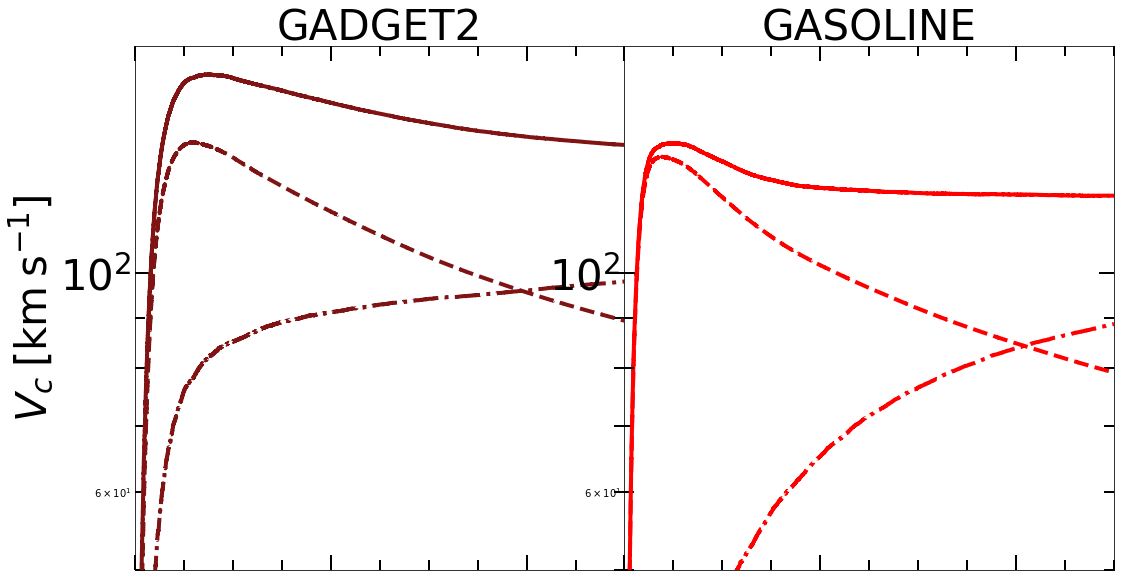

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax[0].plot(rtot_MWgd, Vtot_MWgd, '-', lw=4, color='#801414', label= 'Total')
ax[0].plot(rstr_MWgd, Vstr_MWgd, '--',lw=4, color='#801414', label ='Stars')
# ax[0].plot(rgas_MWgd, Vgas_MWgd, ':', color ='#801414',lw=4, label='Gas')
ax[0].plot(rdrk_MWgd, Vdrk_MWgd, '-.',color='#801414', lw=4, label='Dark Matter')
# ax[0].set_ylim(0,200)
ax[0].set_ylim(50,170)

ax[0].set_xlim(0,5)
ax[0].set_ylabel(r'$V_{c}\:\mathrm{[km\:s^{-1}]}$', fontsize=42)
# ax[0].set_xticks([0,5,10,15,20,25,30])
# ax[0].set_yticks([50,100,150,200])
ax[0].set_xticklabels([])
ax[0].minorticks_on()
ax[0].tick_params( labelsize=42)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')
ax[0].set_yscale('log')
# ax[0].set_xscale('log')

ax[0].arrow(x=r50_MWgd,y=10,dx=0,dy=-10,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)
ax[0].arrow(x=r200_MWgd*0.15,y=10,dx=0,dy=-10,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)

# ax[0,0].arrow(x=rcor_M31gd,y=200,dx=0,dy=-30,color='k', lw=3.5,
#              head_length=8,head_width=1,length_includes_head=True)

# ax[0].arrow(x=25,y=Vtot_MWgd[-1],dx=5,dy=0,color='k', lw=3.5,
#              head_length=1.2,head_width=6,length_includes_head=True, zorder=1)


# ax[0].text(24, Vtot_MWgd[-1], '$\mathrm{V_{vir}}$', fontsize=42, color='black', ha='left', va='bottom')
# ax[0].text(r50_MWgd+0.5, 30, '$\mathrm{r_{50}}$', fontsize=42, color='black', ha='center', va='bottom')
# ax[0].text(r200_MWgd*0.15, 30, '$\mathrm{r_{gal}}$', fontsize=42, color='black', ha='center', va='bottom')
# ax[0].text(rcor_MWgd+0.5, 178, '$R_\mathrm{corot}}$', fontsize=42, color='black', ha='left', va='bottom')


# ax[0].text(28, 165, '$f_\mathrm{disk} = 0.85$', fontsize=38, color='black', ha='right', va='center')
# ax[0].text(28, 180, '$\mathrm{A}$', fontsize=42, color='black',ha='right', va='bottom')

# ax[0].text(10, 40, '$\mathrm{Gas}$', fontsize=38, color='k', ha='left', va='center')
# ax[0].text(10, 75, '$\mathrm{Stars}$', fontsize=38, color='k', ha='left', va='center')
# ax[0].text(10, 110, '$\mathrm{Dark\:Matter}$', fontsize=38, color='k', ha='left', va='center')
# ax[0].text(10, 130, '$\mathrm{Total}$', fontsize=38, color='k', ha='left', va='center')

ax[0].set_title('GADGET2', loc='center', fontsize=42)

#------------------------------------------------------

# # ax2=fig.add_subplot(222)
ax[1].plot(rtot_MWgs, Vtot_MWgs, '-', lw=4, color='#FF0000', label= 'Total',zorder=1)
ax[1].plot(rstr_MWgs, Vstr_MWgs, '--',lw=4, color='#FF0000', label ='Stars')
# ax[1].plot(rgas_MWgs, Vgas_MWgs, ':', color ='#FF0000',lw=4, label='Gas')
ax[1].plot(rdrk_MWgs, Vdrk_MWgs, '-.',color='#FF0000', lw=4, label='Dark Matter')

ax[1].set_ylim(50,170)
ax[1].set_xlim(0,5)
# ax[1].set_xticks([0,5,10,15,20,25,30])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_yscale('log')
# ax[1].set_xscale('log')
ax[1].minorticks_on()
ax[1].tick_params( labelsize=42)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].arrow(x=r50_MWgs,y=10,dx=0,dy=-10,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)

ax[1].arrow(x=r200_MWgs*0.15,y=10,dx=0,dy=-10,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)

# ax[0,1].arrow(x=rcor_M31gs,y=200,dx=0,dy=-30,color='k', lw=3.5,
#              head_length=8,head_width=1,length_includes_head=True)

# ax[1].arrow(x=25,y=Vtot_MWgs[-1],dx=5,dy=0,color='k', lw=3.5,
#              head_length=1.2,head_width=6,length_includes_head=True, zorder=2)

# ax[0,1].text(28, 180, '$\mathrm{A}$', fontsize=42, color='black',ha='right', va='bottom')
# ax[0,1].text(28, 165, '$f_\mathrm{disk} = 0.75$', fontsize=38, color='black', ha='right', va='center')


ax[1].set_title('GASOLINE', loc='center', fontsize=42)

plt.show()

### Tiempo en fdisk

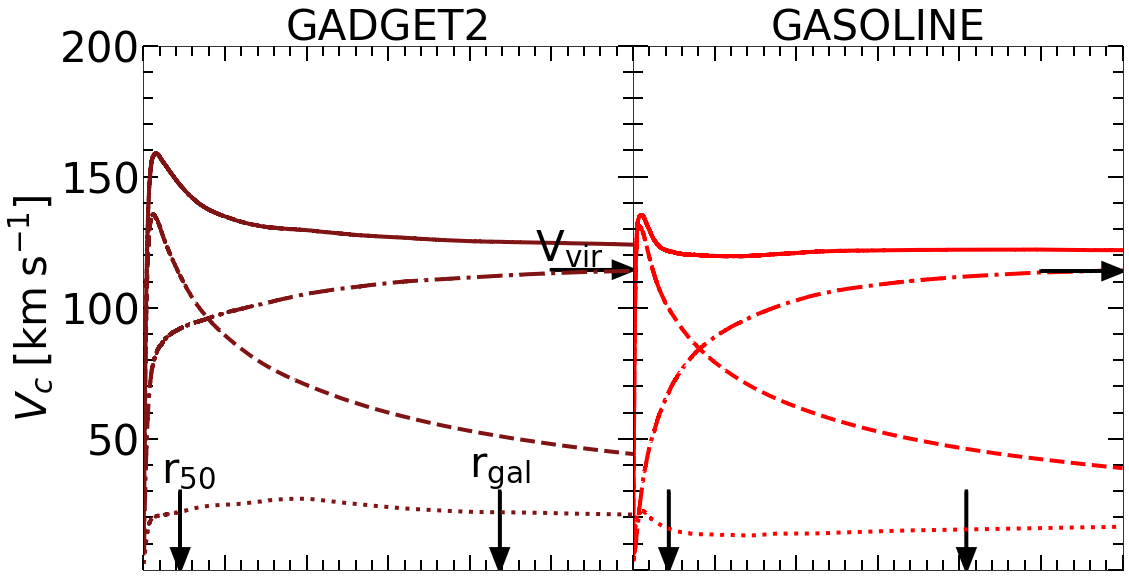

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax[0].plot(rtot_MWgd, Vtot_MWgd, '-', lw=4, color='#801414', label= 'Total')
ax[0].plot(rstr_MWgd, Vstr_MWgd, '--',lw=4, color='#801414', label ='Stars')
ax[0].plot(rgas_MWgd, Vgas_MWgd, ':', color ='#801414',lw=4, label='Gas')
ax[0].plot(rdrk_MWgd, Vdrk_MWgd, '-.',color='#801414', lw=4, label='Dark Matter')
ax[0].set_ylim(0,200)
ax[0].set_xlim(0,30)
ax[0].set_ylabel(r'$V_{c}\:\mathrm{[km\:s^{-1}]}$', fontsize=42)
ax[0].set_xticks([0,5,10,15,20,25,30])
ax[0].set_yticks([50,100,150,200])
ax[0].set_xticklabels([])
ax[0].minorticks_on()
ax[0].tick_params( labelsize=42)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[0].arrow(x=r50_MWgd,y=30,dx=0,dy=-30,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)
ax[0].arrow(x=r200_MWgd*0.15,y=30,dx=0,dy=-30,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)

# ax[0,0].arrow(x=rcor_M31gd,y=200,dx=0,dy=-30,color='k', lw=3.5,
#              head_length=8,head_width=1,length_includes_head=True)

ax[0].arrow(x=25,y=Vtot_MWgd[-1],dx=5,dy=0,color='k', lw=3.5,
             head_length=1.2,head_width=6,length_includes_head=True, zorder=1)


ax[0].text(24, Vtot_MWgd[-1], '$\mathrm{V_{vir}}$', fontsize=42, color='black', ha='left', va='bottom')
ax[0].text(r50_MWgd+0.5, 30, '$\mathrm{r_{50}}$', fontsize=42, color='black', ha='center', va='bottom')
ax[0].text(r200_MWgd*0.15, 30, '$\mathrm{r_{gal}}$', fontsize=42, color='black', ha='center', va='bottom')
# ax[0].text(rcor_MWgd+0.5, 178, '$R_\mathrm{corot}}$', fontsize=42, color='black', ha='left', va='bottom')


# ax[0].text(28, 165, '$f_\mathrm{disk} = 0.85$', fontsize=38, color='black', ha='right', va='center')
# ax[0].text(28, 180, '$\mathrm{A}$', fontsize=42, color='black',ha='right', va='bottom')

# ax[0].text(10, 40, '$\mathrm{Gas}$', fontsize=38, color='k', ha='left', va='center')
# ax[0].text(10, 75, '$\mathrm{Stars}$', fontsize=38, color='k', ha='left', va='center')
# ax[0].text(10, 110, '$\mathrm{Dark\:Matter}$', fontsize=38, color='k', ha='left', va='center')
# ax[0].text(10, 130, '$\mathrm{Total}$', fontsize=38, color='k', ha='left', va='center')

ax[0].set_title('GADGET2', loc='center', fontsize=42)

#------------------------------------------------------

# # ax2=fig.add_subplot(222)
ax[1].plot(rtot_MWgs, Vtot_MWgs, '-', lw=4, color='#FF0000', label= 'Total',zorder=1)
ax[1].plot(rstr_MWgs, Vstr_MWgs, '--',lw=4, color='#FF0000', label ='Stars')
ax[1].plot(rgas_MWgs, Vgas_MWgs, ':', color ='#FF0000',lw=4, label='Gas')
ax[1].plot(rdrk_MWgs, Vdrk_MWgs, '-.',color='#FF0000', lw=4, label='Dark Matter')

ax[1].set_ylim(0,200)
ax[1].set_xlim(0,30)
ax[1].set_xticks([0,5,10,15,20,25,30])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

ax[1].minorticks_on()
ax[1].tick_params( labelsize=42)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].arrow(x=r50_MWgs,y=30,dx=0,dy=-30,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)
ax[1].arrow(x=r200_MWgs*0.15,y=30,dx=0,dy=-30,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)

# ax[0,1].arrow(x=rcor_M31gs,y=200,dx=0,dy=-30,color='k', lw=3.5,
#              head_length=8,head_width=1,length_includes_head=True)

ax[1].arrow(x=25,y=Vtot_MWgs[-1],dx=5,dy=0,color='k', lw=3.5,
             head_length=1.2,head_width=6,length_includes_head=True, zorder=2)

# ax[0,1].text(28, 180, '$\mathrm{A}$', fontsize=42, color='black',ha='right', va='bottom')
# ax[0,1].text(28, 165, '$f_\mathrm{disk} = 0.75$', fontsize=38, color='black', ha='right', va='center')


ax[1].set_title('GASOLINE', loc='center', fontsize=42)

plt.show()

In [11]:
path = '/mnt/sersic2/omarioni/'
snapshot = np.loadtxt(path + 'Gasoline/snapshots.txt', dtype='string')

for j in range(len(snapshot)-1,44,-1):
    print j, snapshot[j]

59 1024
58 1008
57 0992
56 0976
55 0960
54 0944
53 0928
52 0912
51 0896
50 0880
49 0864
48 0848
47 0832
46 0816
45 0800


In [28]:
import h5py
import rotation_mio as rot
import barstrength2 as strng

a0=1

vector = (1,2,4)
vector2 = ('M31', 'MW','M33')

#path = 'home/ornela/SimCLUES/'
path = '/mnt/sersic2/omarioni/'

snapshot = np.loadtxt(path + 'Gasoline/snapshots.txt', dtype='string')


for j in range(len(snapshot)-1,0,-1):
    snap = h5py.File(path + 'Gasoline/outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')

#     print snapshot[j]

    for i in range(0,1):
        time = snap['subhalo_00'+ str('%s' %vector[i])+ '/Time'].value
        aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'].value
        print snapshot[j], time, aexp

1024 13.729565519987414 1.0000000000140292
1008 13.515321632086817 0.9840854832450174
0992 13.30107774418595 0.9683306222125518
0976 13.086833856285102 0.9527313129907985
0960 12.872589968384355 0.9372834409065818
0944 12.65834608048369 0.9219828775848915
0928 12.444102192583028 0.9068254778372923
0912 12.22985830468233 0.891807076378411
0896 12.015614416783436 0.8769234843541752
0880 11.801370528883313 0.8621704856628021
0864 11.587126640982719 0.8475438330498616
0848 11.372882753082049 0.8330392439527204
0832 11.158638865181278 0.818652396070184
0816 10.944394977280524 0.804378922628607
0800 10.730151089381387 0.7902144073125708
0784 10.515907201480614 0.7761543788235893
0768 10.301663313580919 0.7621943050279477
0752 10.087419425680089 0.7483295866452315
0736 9.873175537781265 0.7345555504283752
0720 9.658931649880785 0.7208674417732805
0704 9.444687761981976 0.7072604166937579
0688 9.230443874081969 0.693729533081392
0672 9.016199986182293 0.6802697411652779
0656 8.80195609828155 0